In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import random

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
data['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

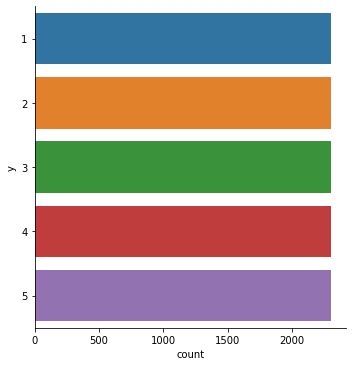

In [6]:
sb.catplot(y = "y", data = data, kind = "count")

In [7]:
new = data['Unnamed: 0'].str.split("X", expand = True)
new1 = new.iloc[:,1].str.split(".",expand=True)
for i in range(11500):
        if new1[2][i]==None:
            new1[2][i]=new1[1][i]
data['Time']=new1.iloc[:,0]
data['V']=new1.iloc[:,1]
data['ID']=new1.iloc[:,2]

In [8]:
time=12 # Any second from 1 to 23 can be used
first=data[data["Time"]==str(time)]
a=[]
b=[]
c=[]
d=[]
e=[]
for i in range (11500):
    try:
        if first["y"][i] == 1:
            a.append(i)
        elif first["y"][i] == 2:
            b.append(i)
        elif first["y"][i] == 3:
            c.append(i)
        elif first["y"][i] == 4:
            d.append(i)
        elif first["y"][i] == 5:
            e.append(i)
    except KeyError:
        continue

In [9]:
random.shuffle(a)
random.shuffle(b)
random.shuffle(c)
random.shuffle(d)
random.shuffle(e)
A=data.iloc[a[0:5]].iloc[:,1:179]
B=data.iloc[b[0:5]].iloc[:,1:179]
C=data.iloc[c[0:5]].iloc[:,1:179]
D=data.iloc[d[0:5]].iloc[:,1:179]
E=data.iloc[e[0:5]].iloc[:,1:179]

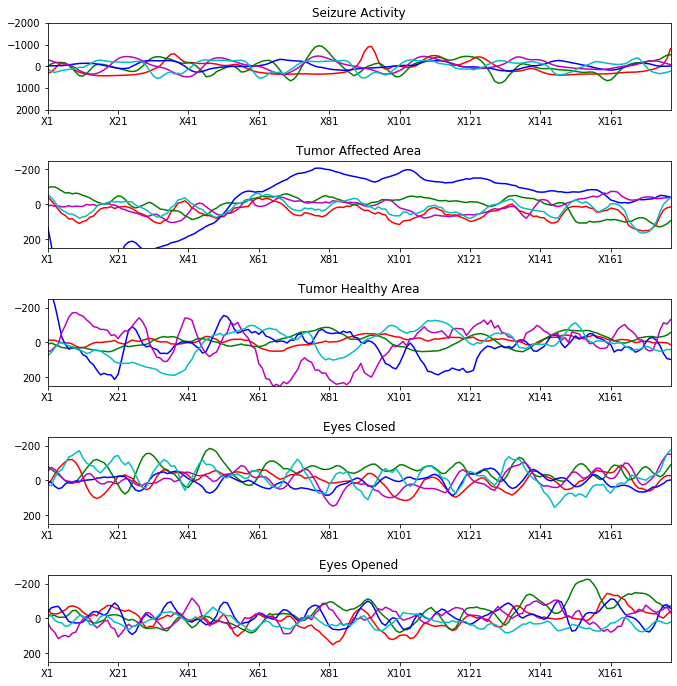

In [22]:
f, axes = plt.subplots(5, 1, figsize=(10, 10))
colors = ["r", "g", "b", "m", "c"]
f.tight_layout(pad=3.0)

count = 0
for i in range(5):
    A.iloc[i].plot.line(ax = axes[0],color=colors[count],title='Seizure Activity').set_ylim(2000,-2000)
    B.iloc[i].plot.line(ax = axes[1],color=colors[count],title='Tumor Affected Area').set_ylim(250,-250)
    C.iloc[i].plot.line(ax = axes[2],color=colors[count],title='Tumor Healthy Area').set_ylim(250,-250)
    D.iloc[i].plot.line(ax = axes[3],color=colors[count],title='Eyes Closed').set_ylim(250,-250)
    E.iloc[i].plot.line(ax = axes[4],color=colors[count],title='Eyes Opened').set_ylim(250,-250)
    count += 1

['X5', 'X159', 'X167', 'X1', 'X158']


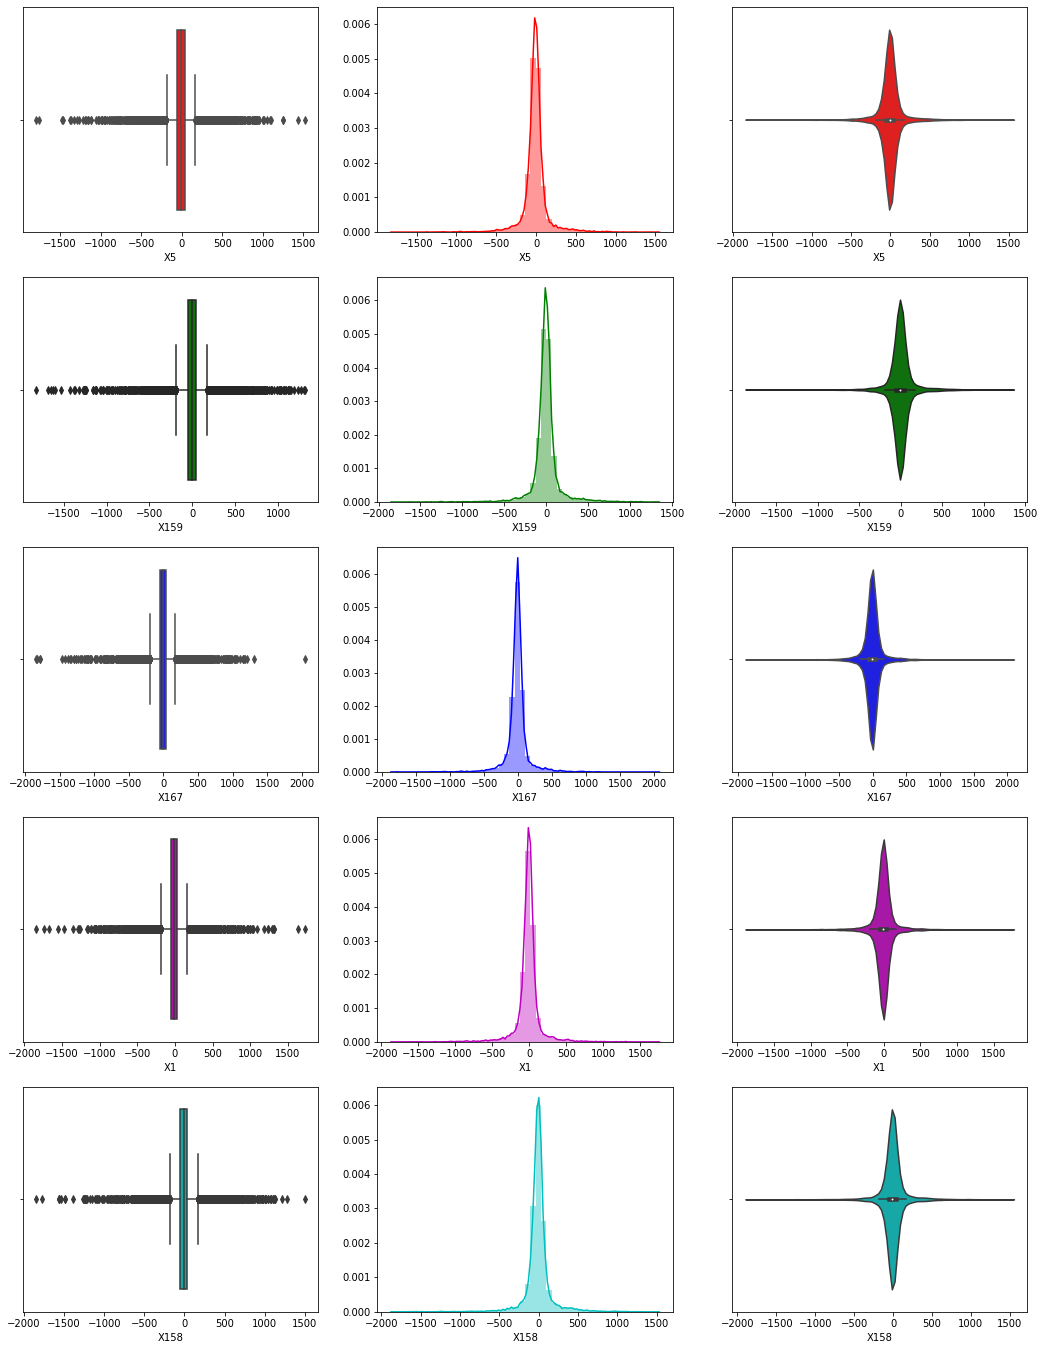

In [11]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]
test_columns = []
for i in range(0,5):
    test_columns.append("X"+str(random.randint(0, 178)))
print(test_columns)
count = 0
for i in test_columns:
    sb.boxplot(data[i], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(data[i], color = colors[count], ax = axes[count,1])
    sb.violinplot(data[i], color = colors[count], ax = axes[count,2])
    count += 1

### From the above graphs our initial hypothesis is that the outliers correspond to the seizure points of the participants, as seizure points have really high values on either side of the distribution.

In [12]:
print("75th Quantile: ",data[test_columns[0]].quantile(0.75))
print("25th Quantile: ",data[test_columns[0]].quantile(0.25))
counter = 0
outlier_counter = 0
seizure_counter = 0
tumor_area_counter=0
tumor_brain_counter=0
eyes_open_counter=0
eyes_closed_counter=0
for i in data[test_columns[0]]:
    if i < data[test_columns[0]].quantile(0.25) or i > data[test_columns[0]].quantile(0.75):
        outlier_counter += 1
        if data["y"][counter] == 1:
            seizure_counter += 1
        elif data["y"][counter] == 2 :
            tumor_area_counter += 1
        elif data["y"][counter] == 3 :
            tumor_brain_counter += 1
        elif data["y"][counter] == 4 :
            eyes_closed_counter += 1
        else:
            eyes_open_counter+=1
    counter += 1
print("PROBABILITY OF OUTLIER POINTS: ")
print("Seizure probability: ",seizure_counter/outlier_counter)
print("Tumor Area probability: ",tumor_area_counter/outlier_counter)
print("Tumor Brain probability: ",tumor_brain_counter/outlier_counter)
print("Eyes Closed probability: ",eyes_closed_counter/outlier_counter)
print("Eyes Open probability: ",eyes_open_counter/outlier_counter)

75th Quantile:  35.0
25th Quantile:  -54.0
PROBABILITY OF OUTLIER POINTS: 
Seizure probability:  0.3432470258922323
Tumor Area probability:  0.16620013995801258
Tumor Brain probability:  0.15675297410776767
Eyes Closed probability:  0.19681595521343598
Eyes Open probability:  0.13698390482855144


### Based on the fraction, we can tell that even though a point is an outlier, it does not mean that the point is an actual seizure point that belongs to a seizure patient, hence furhter analysis is required. But the probability that it's a seizure point is higher than others

In [13]:
for i in range(len(data)):
    if data['y'][i] ==1:
        pass
    else:
        data['y'][i]=0

C:\Users\65905\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
#Description of Epileptic
data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [15]:
print('Totall Mean VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))
print('Totall Std VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().std()).std()))

Totall Mean VALUE for Epiletic: 290.12936095888404
Totall Std VALUE for Epiletic: 53.56315864740058


In [16]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [17]:
print('Totall Mean VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))
print('Totall Std VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Totall Mean VALUE for NON Epiletic: 1260.0989272626161
Totall Std VALUE for NON Epiletic: 15.56104428910097


In [18]:
#creating and calculating 2D indicators in order plot data in 2 dimensions;
def indic(data):
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

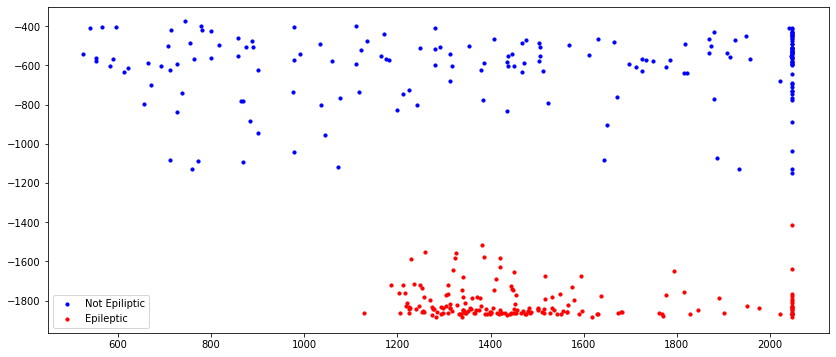

In [19]:
not_epileptic = [data[data['y']==0].iloc[:, range(1, len(data.columns)-4)].values]
epileptic = [data[data['y']==1].iloc[:, range(1, len(data.columns)-4)].values]

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

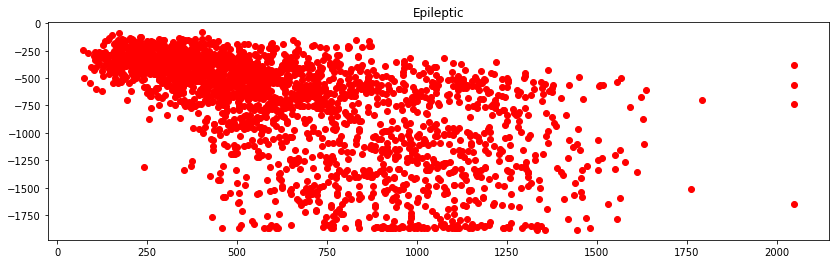

In [20]:
#Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(1, len(data.columns)-3)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

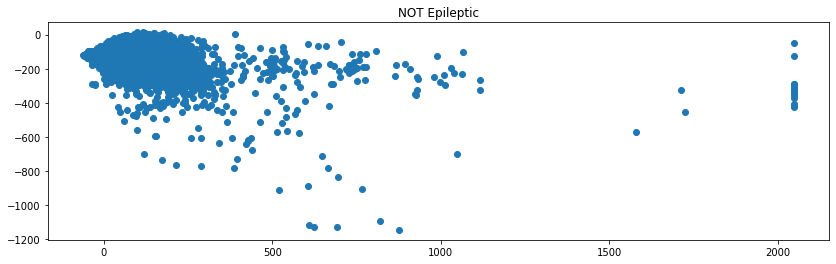

In [21]:
#Not Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(1, len(data.columns)-4)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);